In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 

In [188]:
url = 'https://raw.githubusercontent.com/arima2515/Dicoding-Submission/main/Fish.csv'
fish = pd.read_csv(url)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [189]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [190]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [191]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cbcb01850>,
      dtype=object)

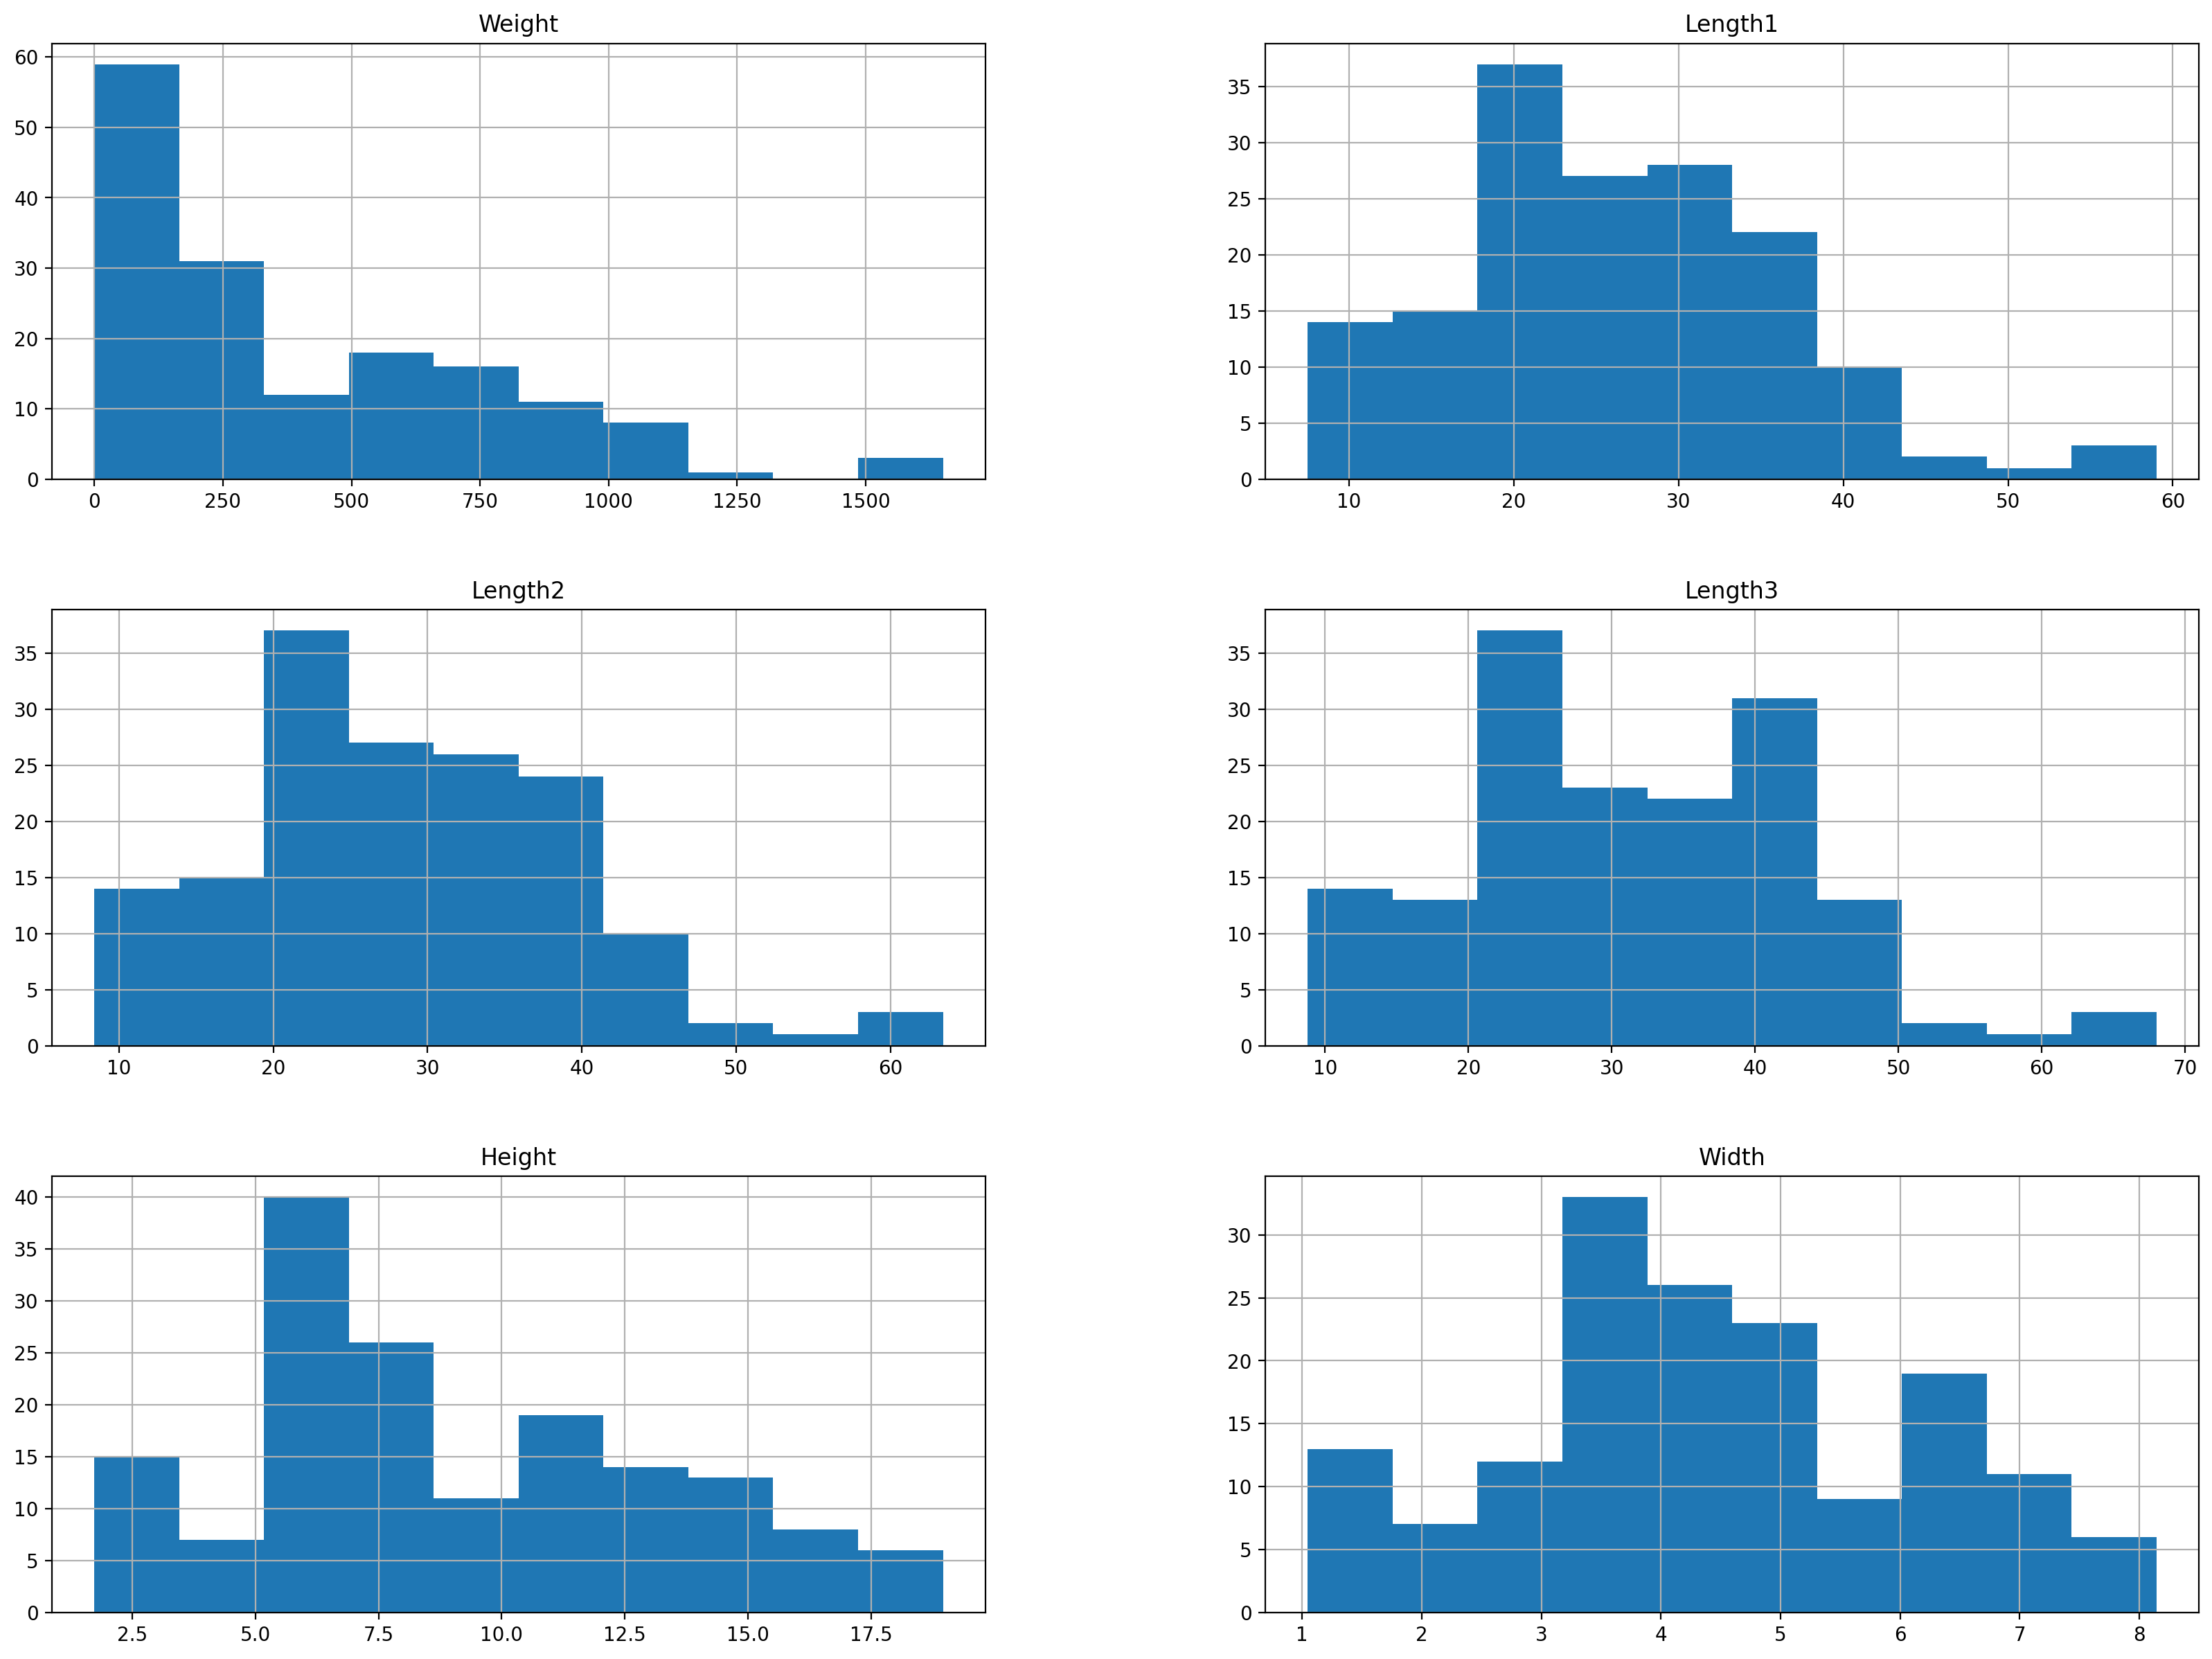

In [192]:
fish.hist(figsize=(20, 15))

In [193]:
numerical_feature = fish._get_numeric_data().columns
categorical_feature = list(set(fish.columns) - set(numerical_feature))

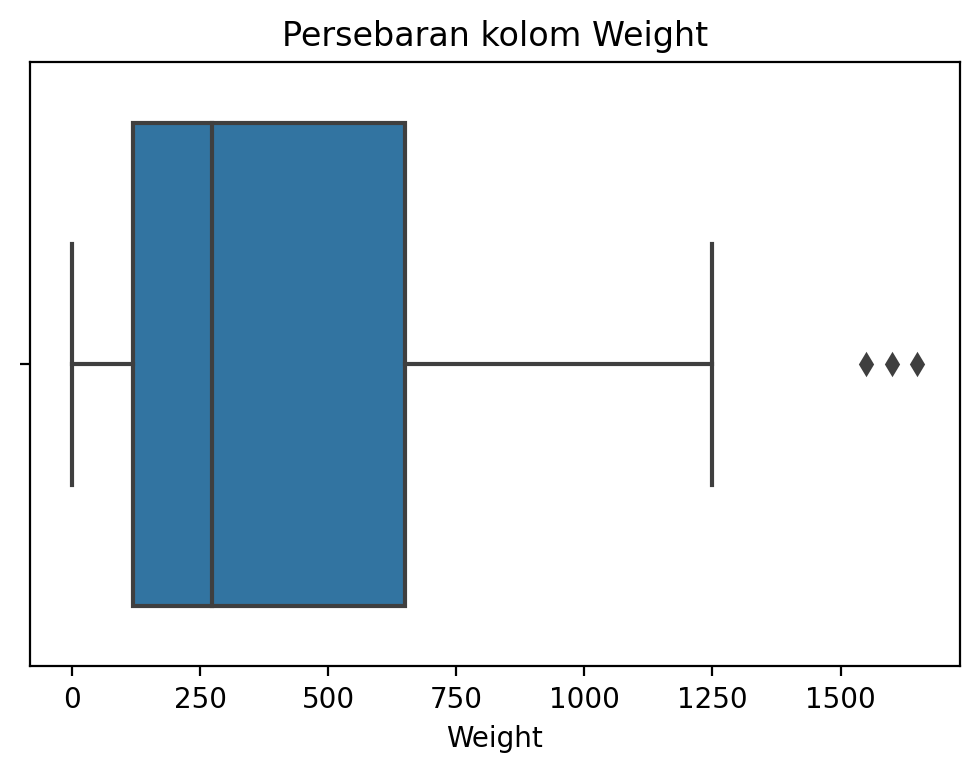

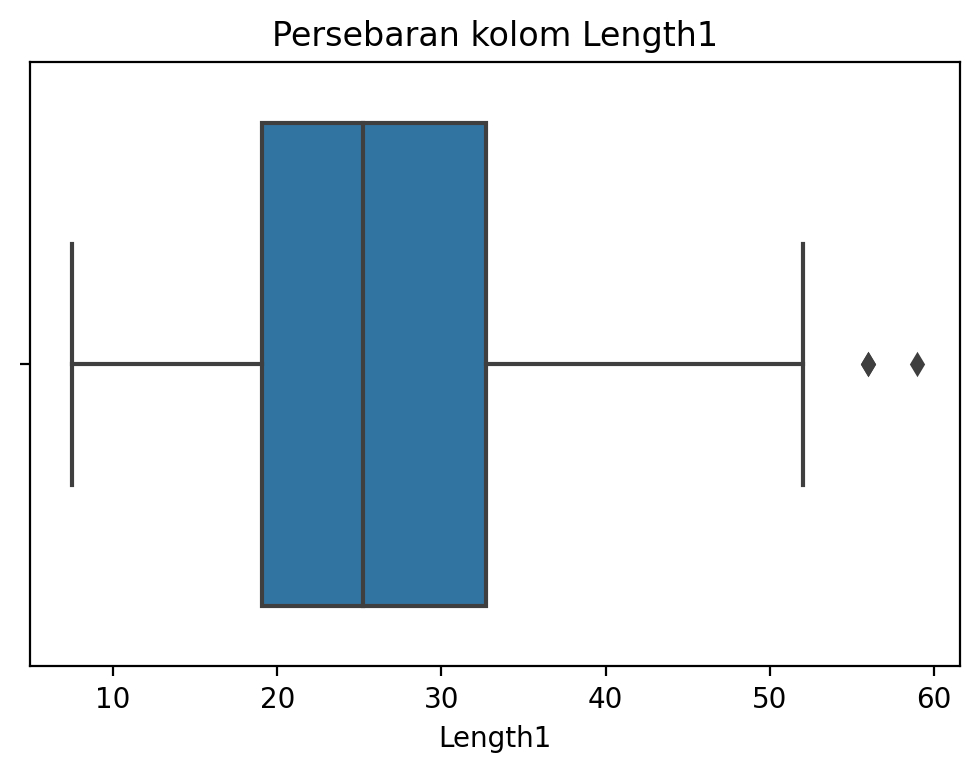

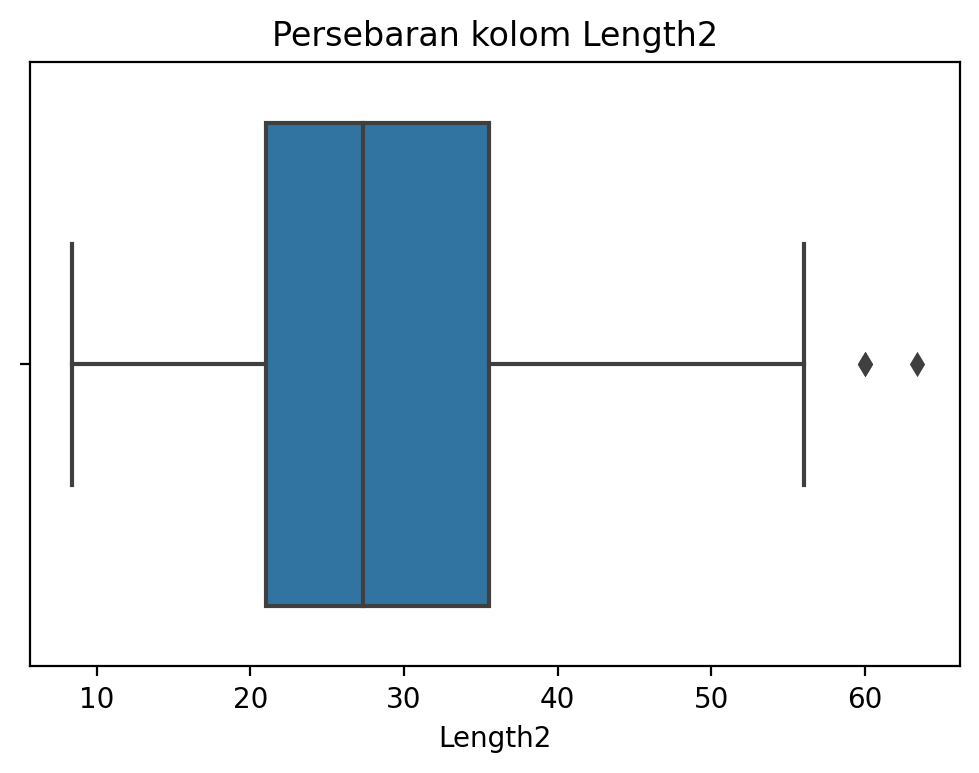

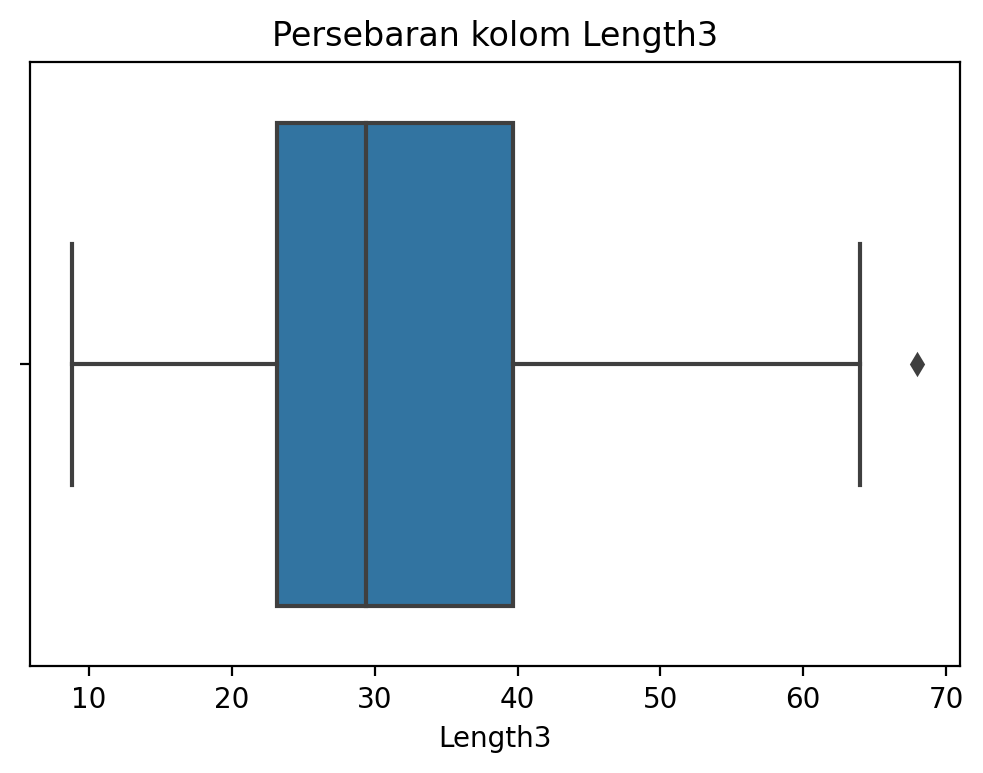

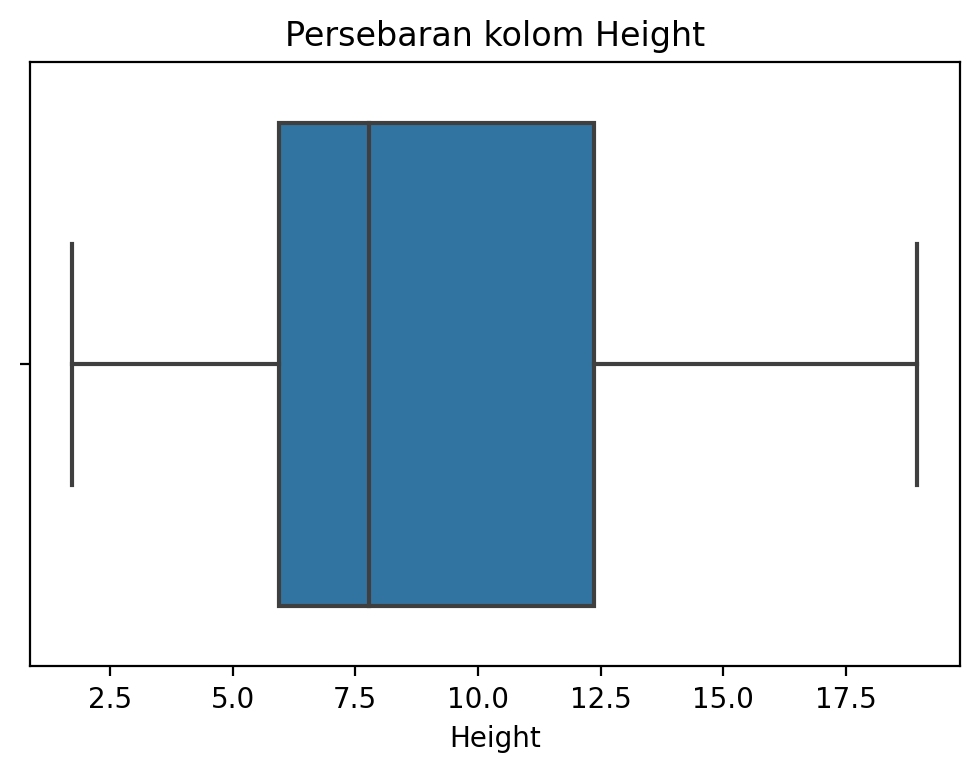

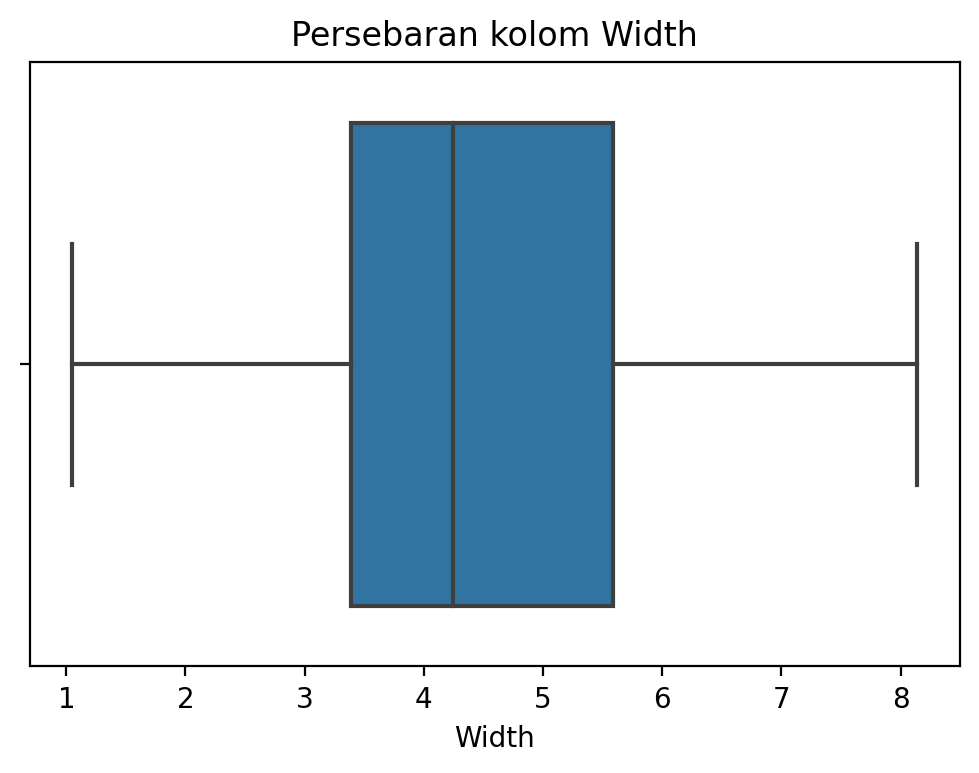

In [194]:
for col in numerical_feature:
  print('===============================================================================================================================')
  plt.title('Persebaran kolom {}'.format(col))
  sns.boxplot(x=fish[col])
  plt.show()
  print('===============================================================================================================================\n')

In [195]:
Q1 = fish.quantile(0.25)
Q3 = fish.quantile(0.75)
IQR=Q3-Q1
fish=fish[~((fish<(Q1-1.5*IQR))|(fish>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
fish.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(156, 7)

           jumlah sampel  persentase
Perch                 56        35.9
Bream                 35        22.4
Roach                 20        12.8
Pike                  14         9.0
Smelt                 14         9.0
Parkki                11         7.1
Whitefish              6         3.8 



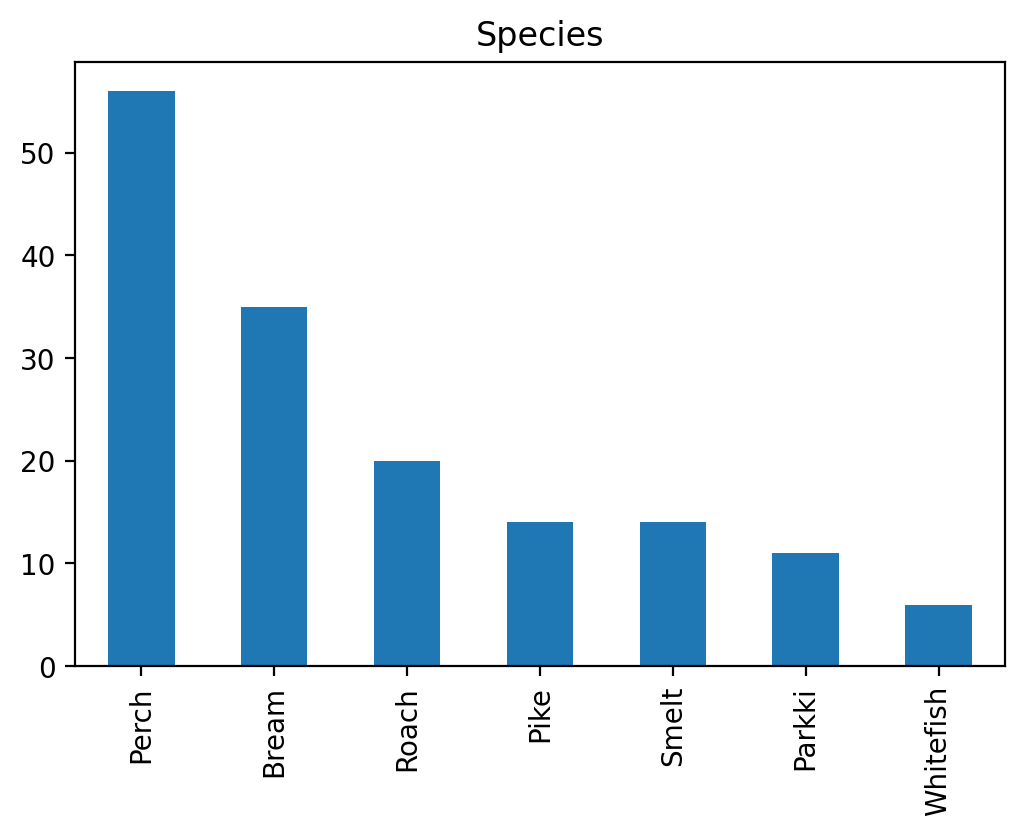

In [196]:

for categorical in categorical_feature:
  print('=====================================================================================================================================')
  count = fish[categorical].value_counts()
  percent = 100*fish[categorical].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel' : count, 'persentase' :percent.round(1)})
  print(df , '\n')
  count.plot(kind='bar', title=categorical)
  plt.show()
  print('=====================================================================================================================================\n')
  


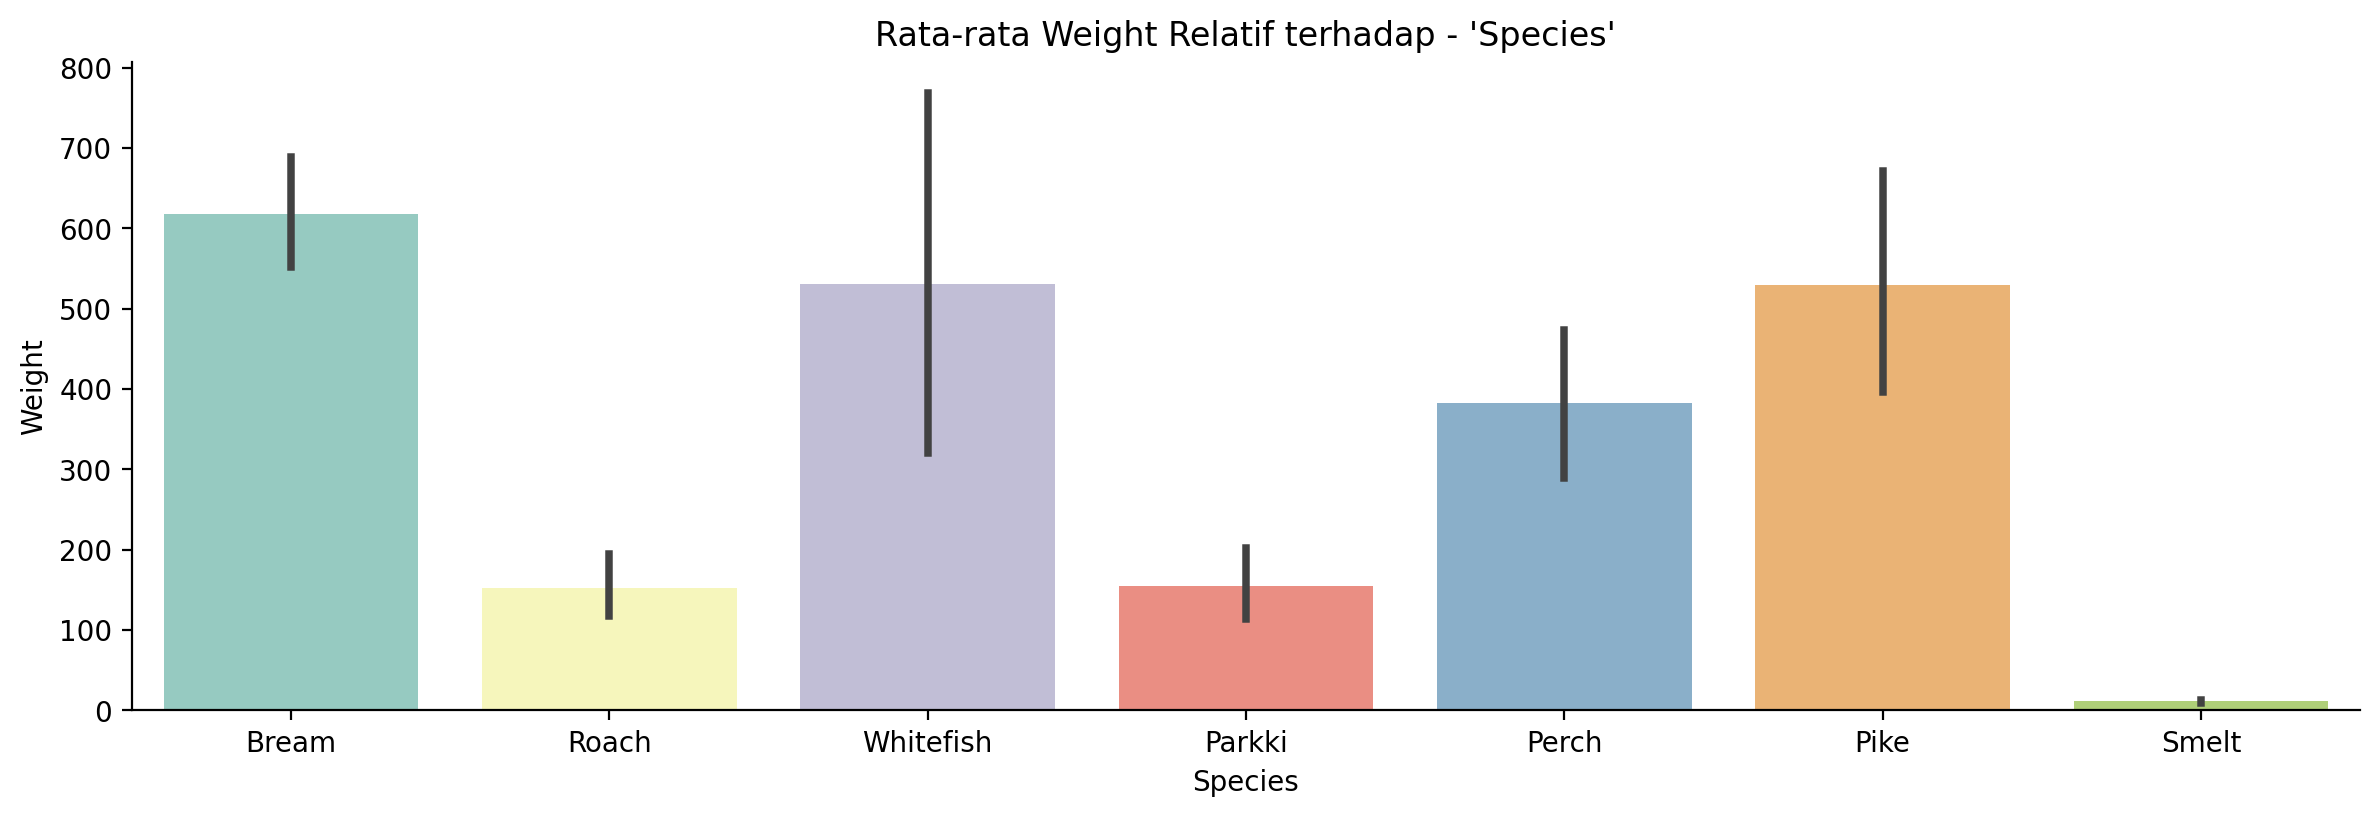

<Figure size 3000x2000 with 0 Axes>

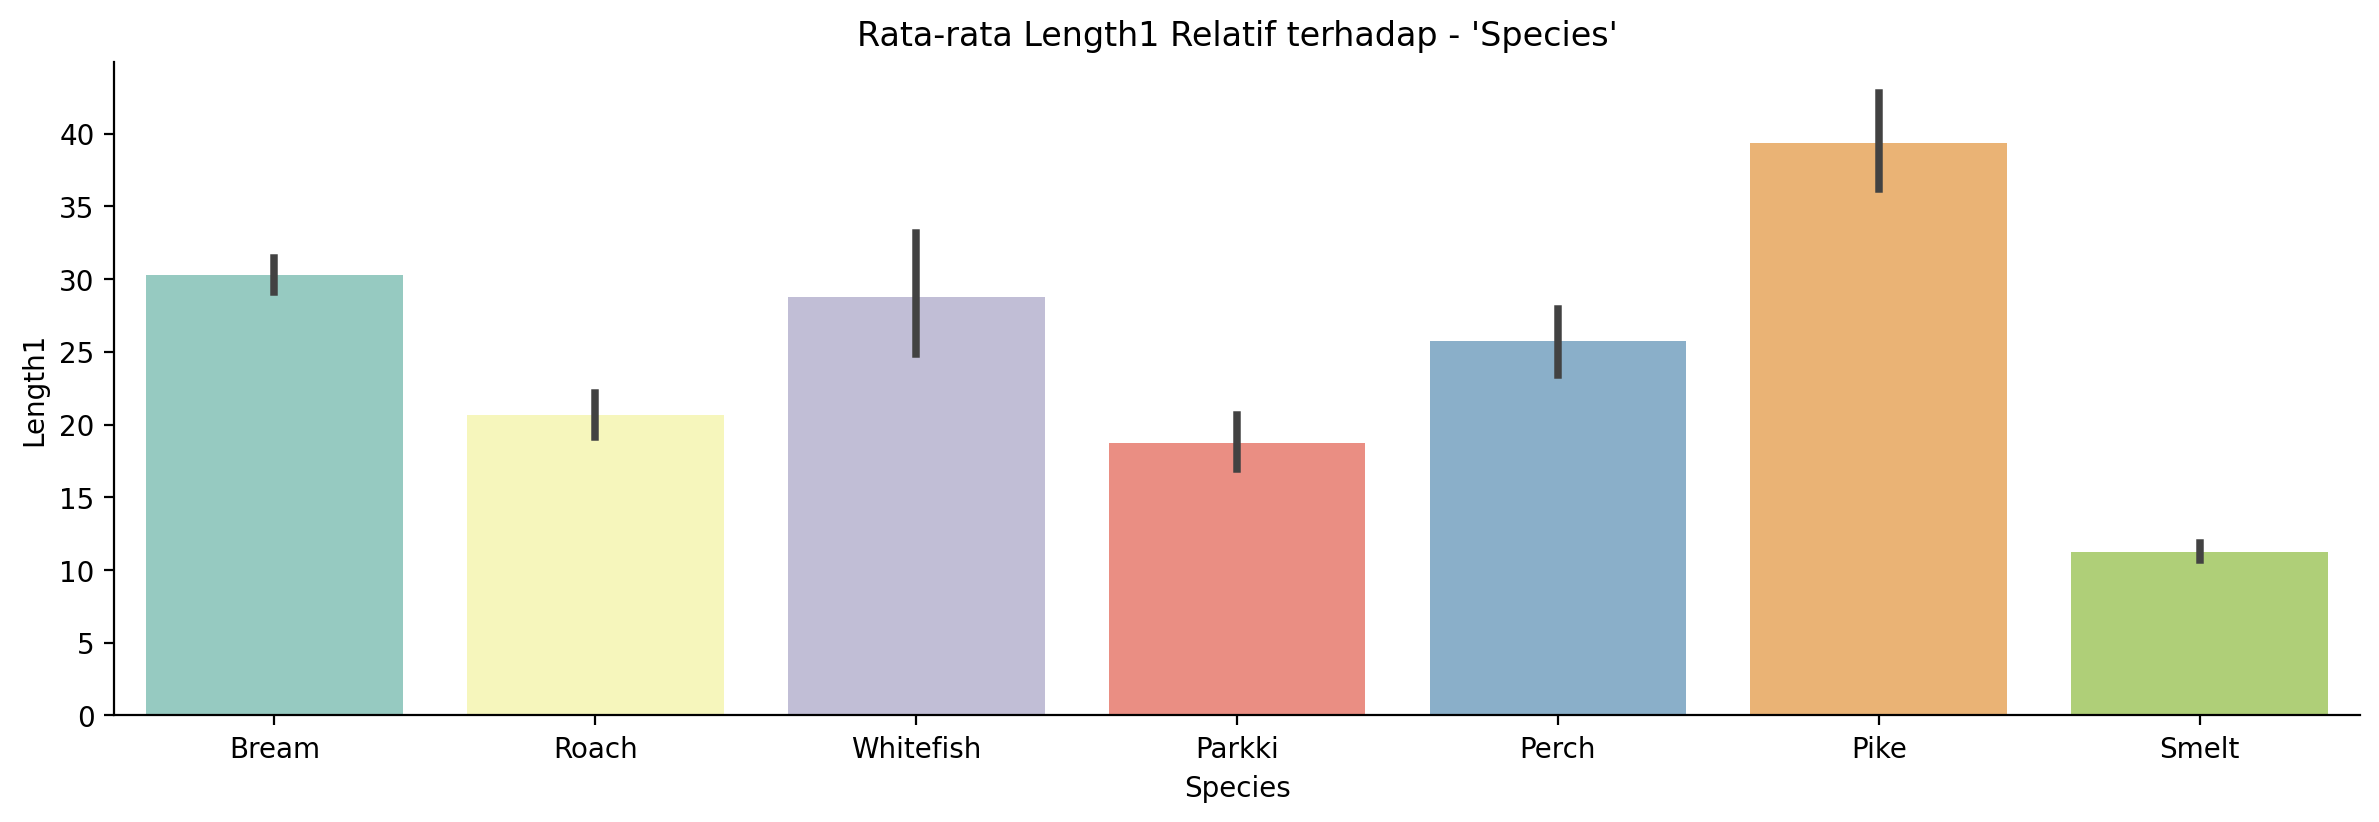

<Figure size 3000x2000 with 0 Axes>

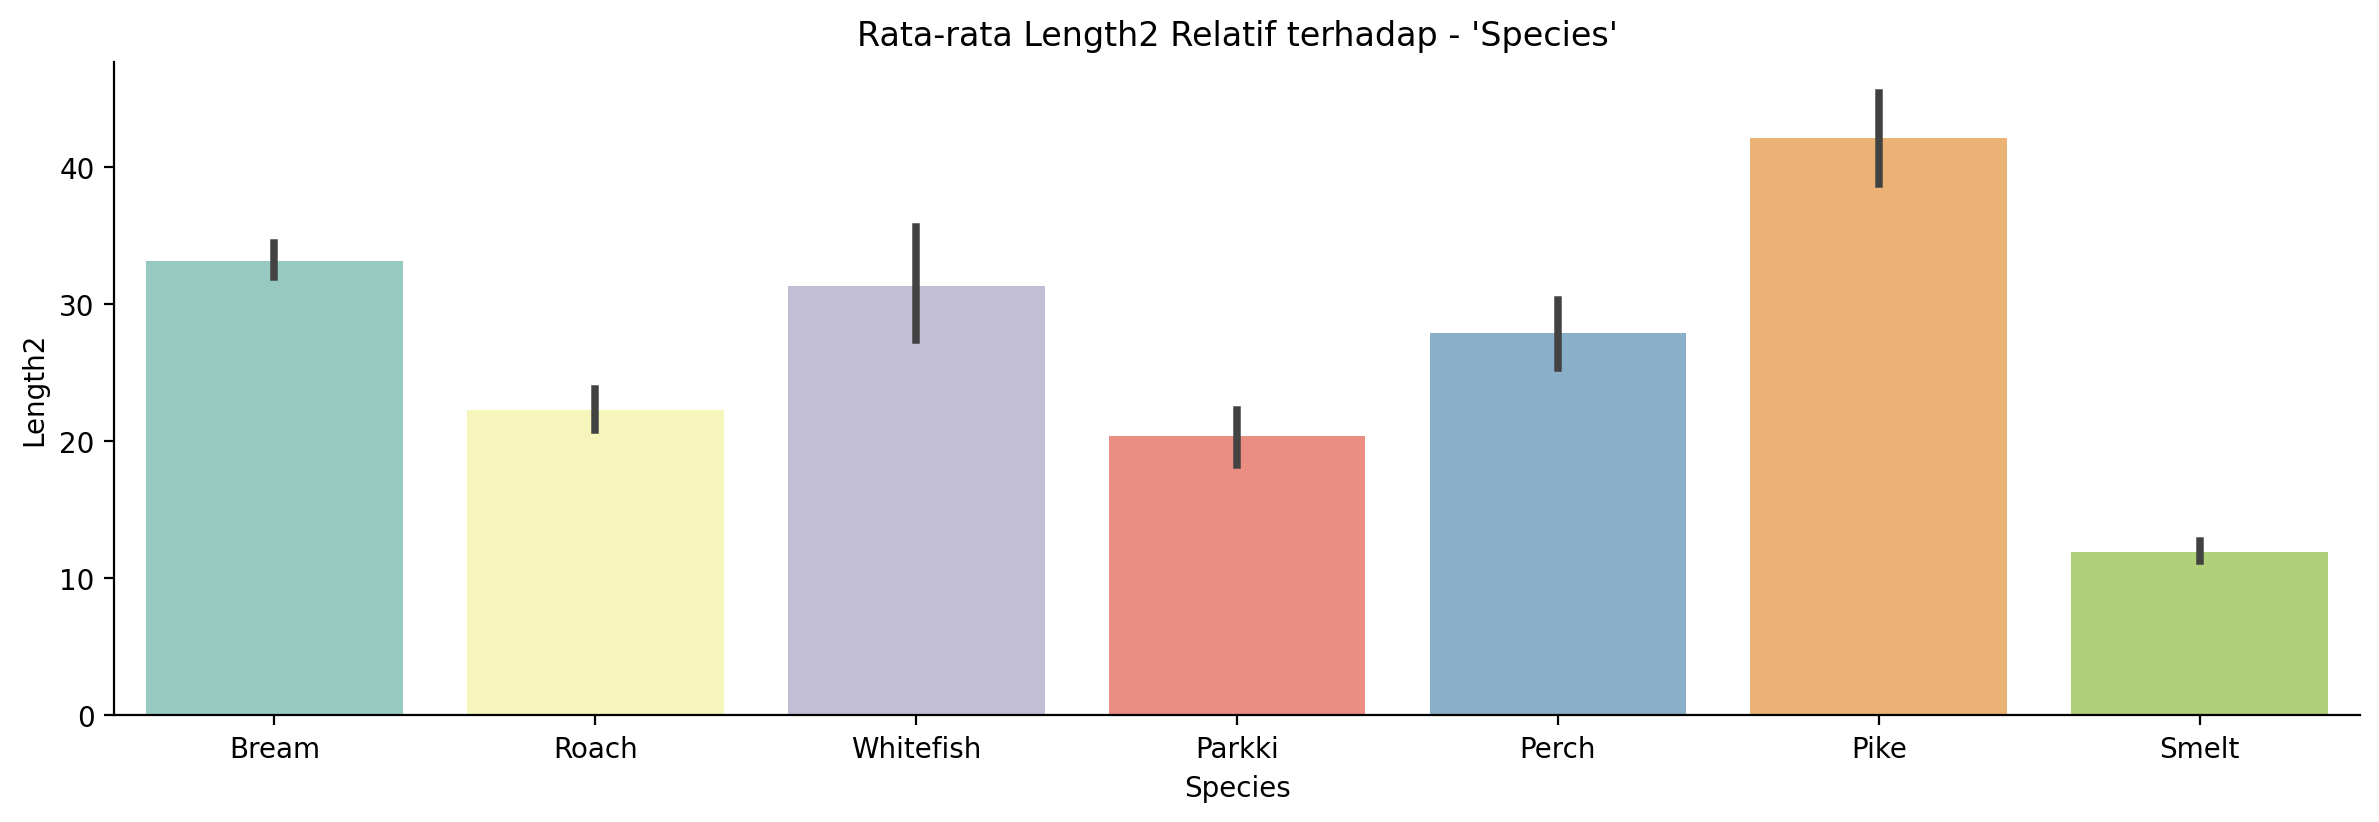

<Figure size 3000x2000 with 0 Axes>

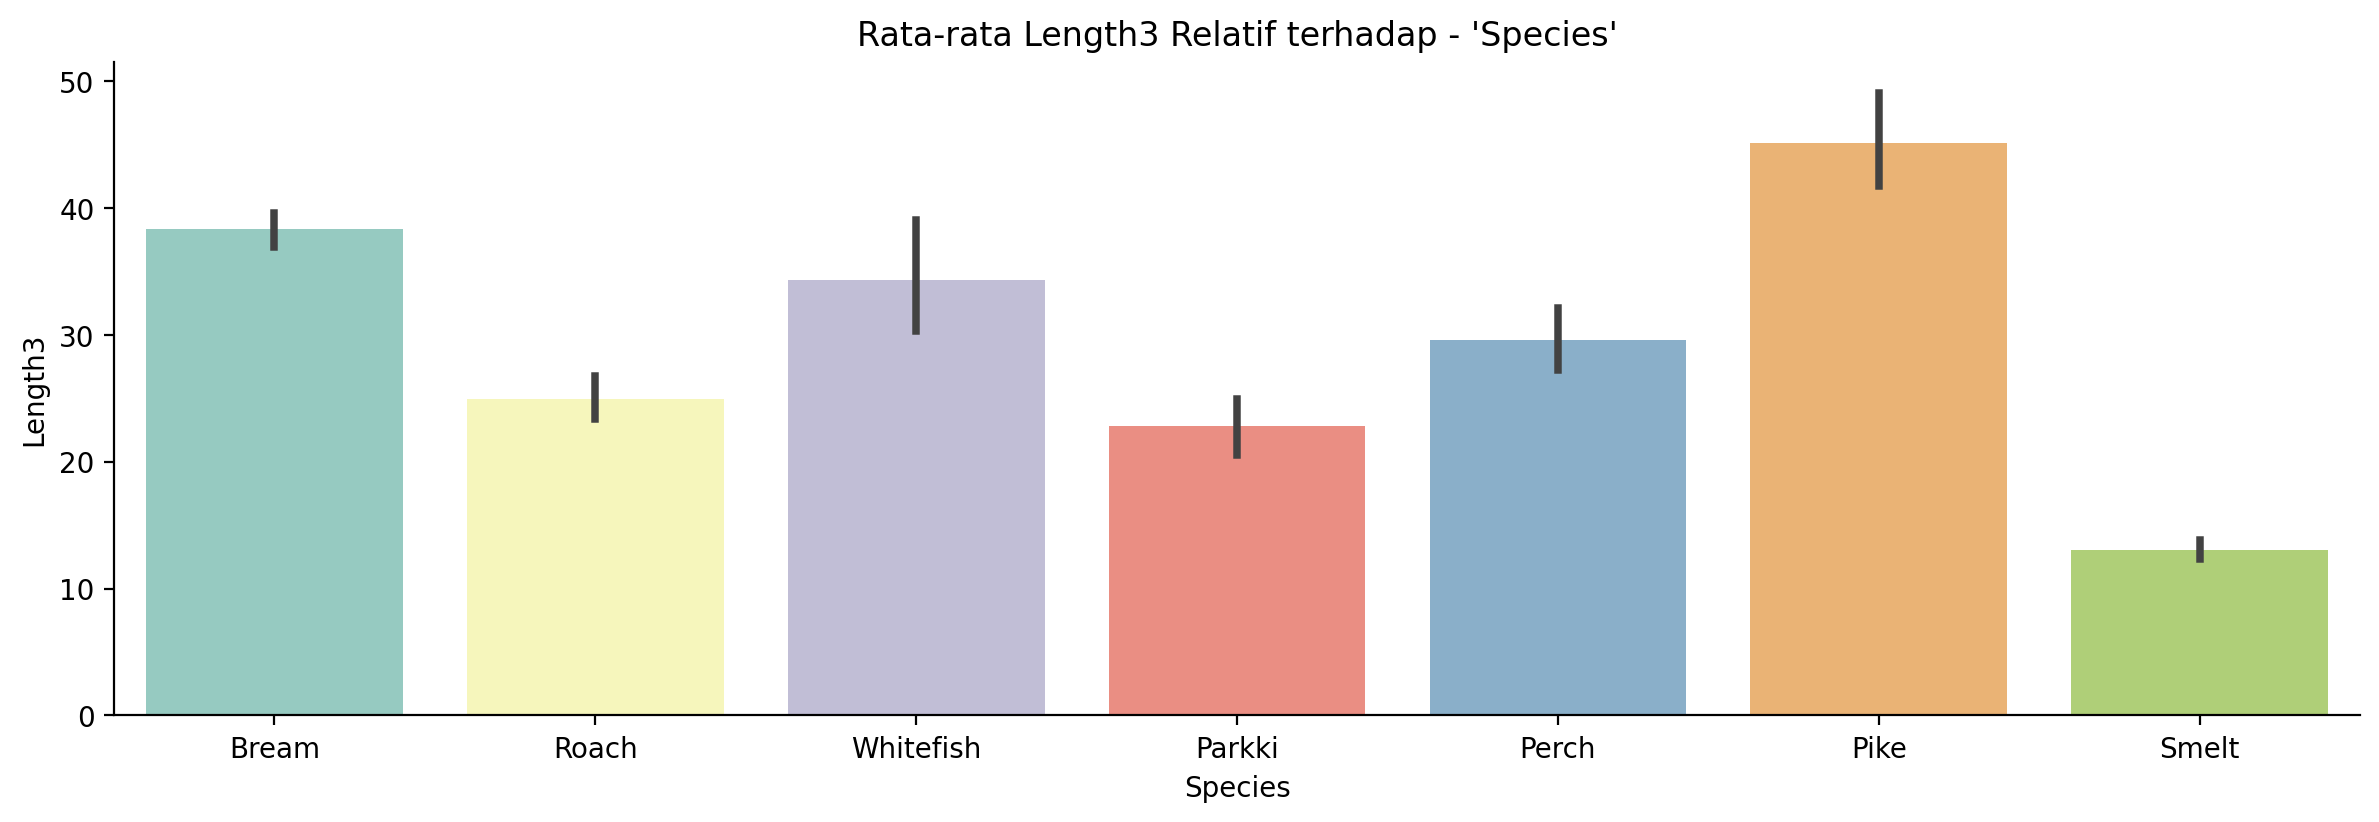

<Figure size 3000x2000 with 0 Axes>

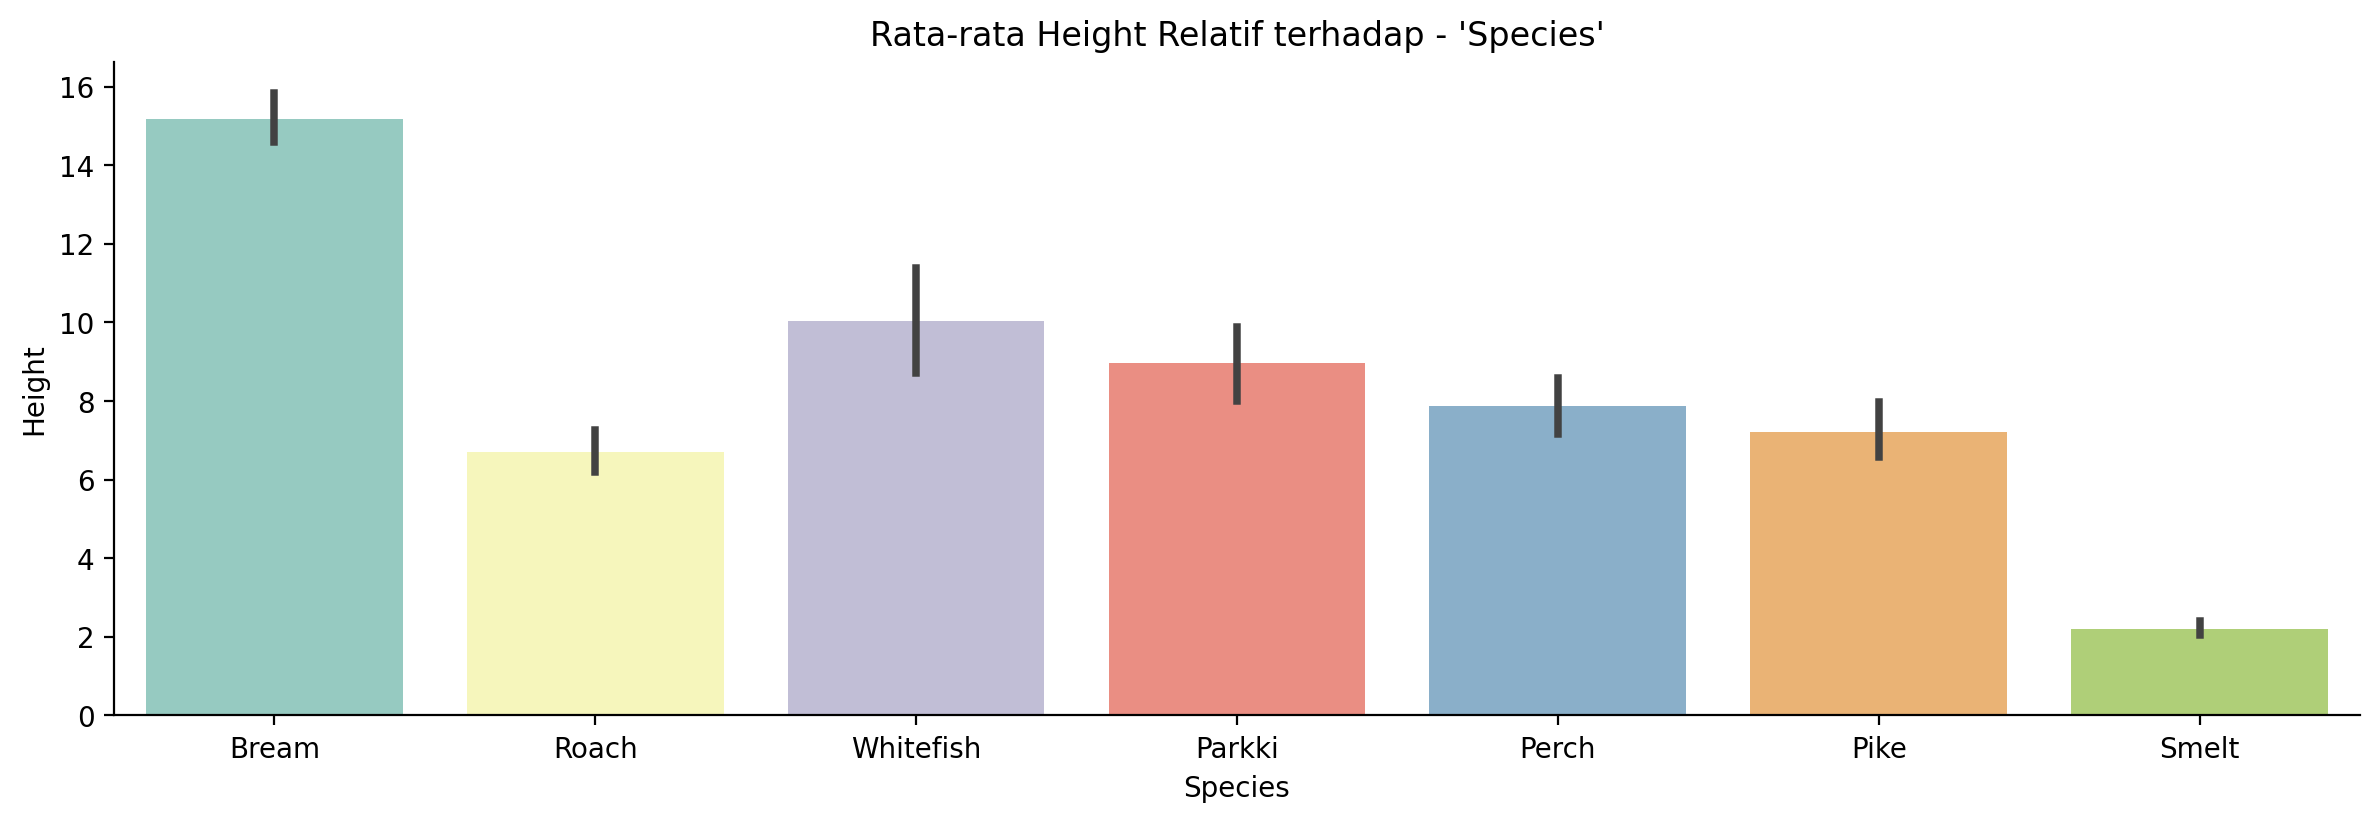

<Figure size 3000x2000 with 0 Axes>

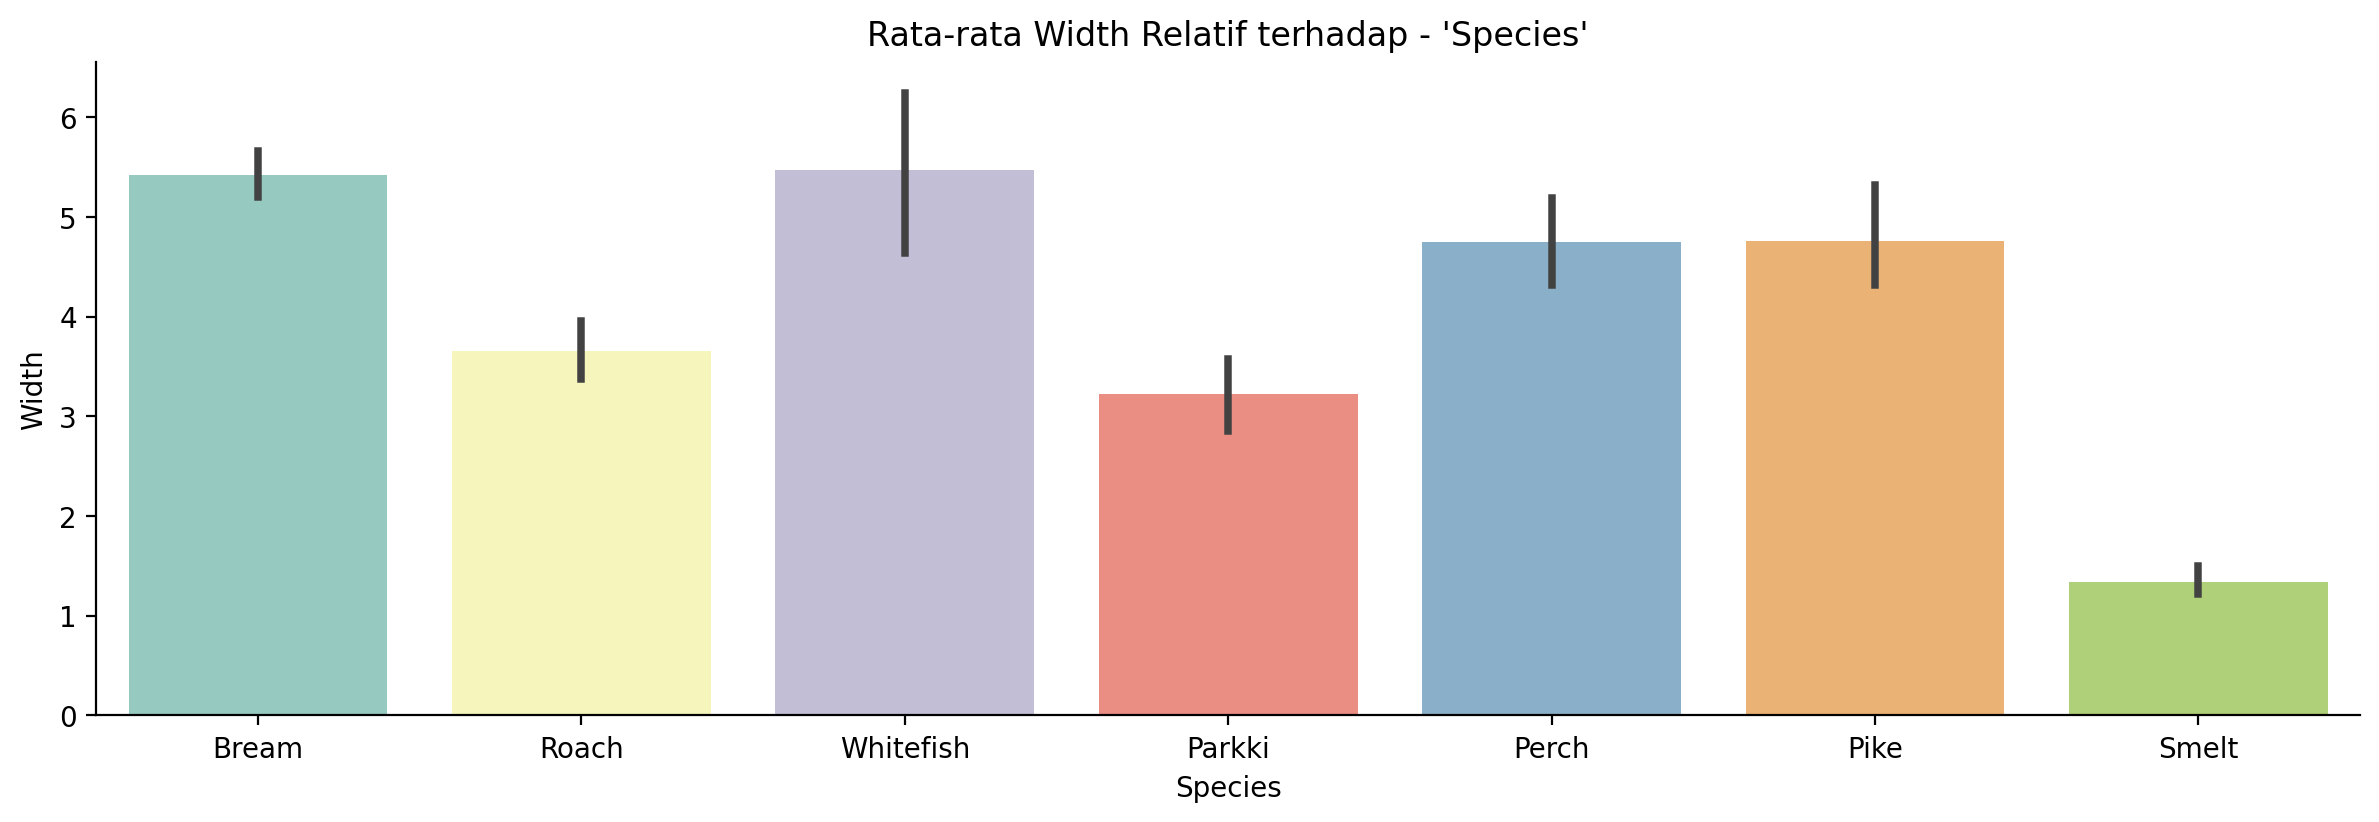

<Figure size 3000x2000 with 0 Axes>

In [197]:
for col in numerical_feature:
  sns.catplot(x='Species', y=col, data=fish, kind='bar', palette='Set3', dodge=False, height = 4, aspect = 3)
  plt.title("Rata-rata {} Relatif terhadap - 'Species'".format(col))
  plt.figure(figsize=(15, 10))
  plt.show()
  print()

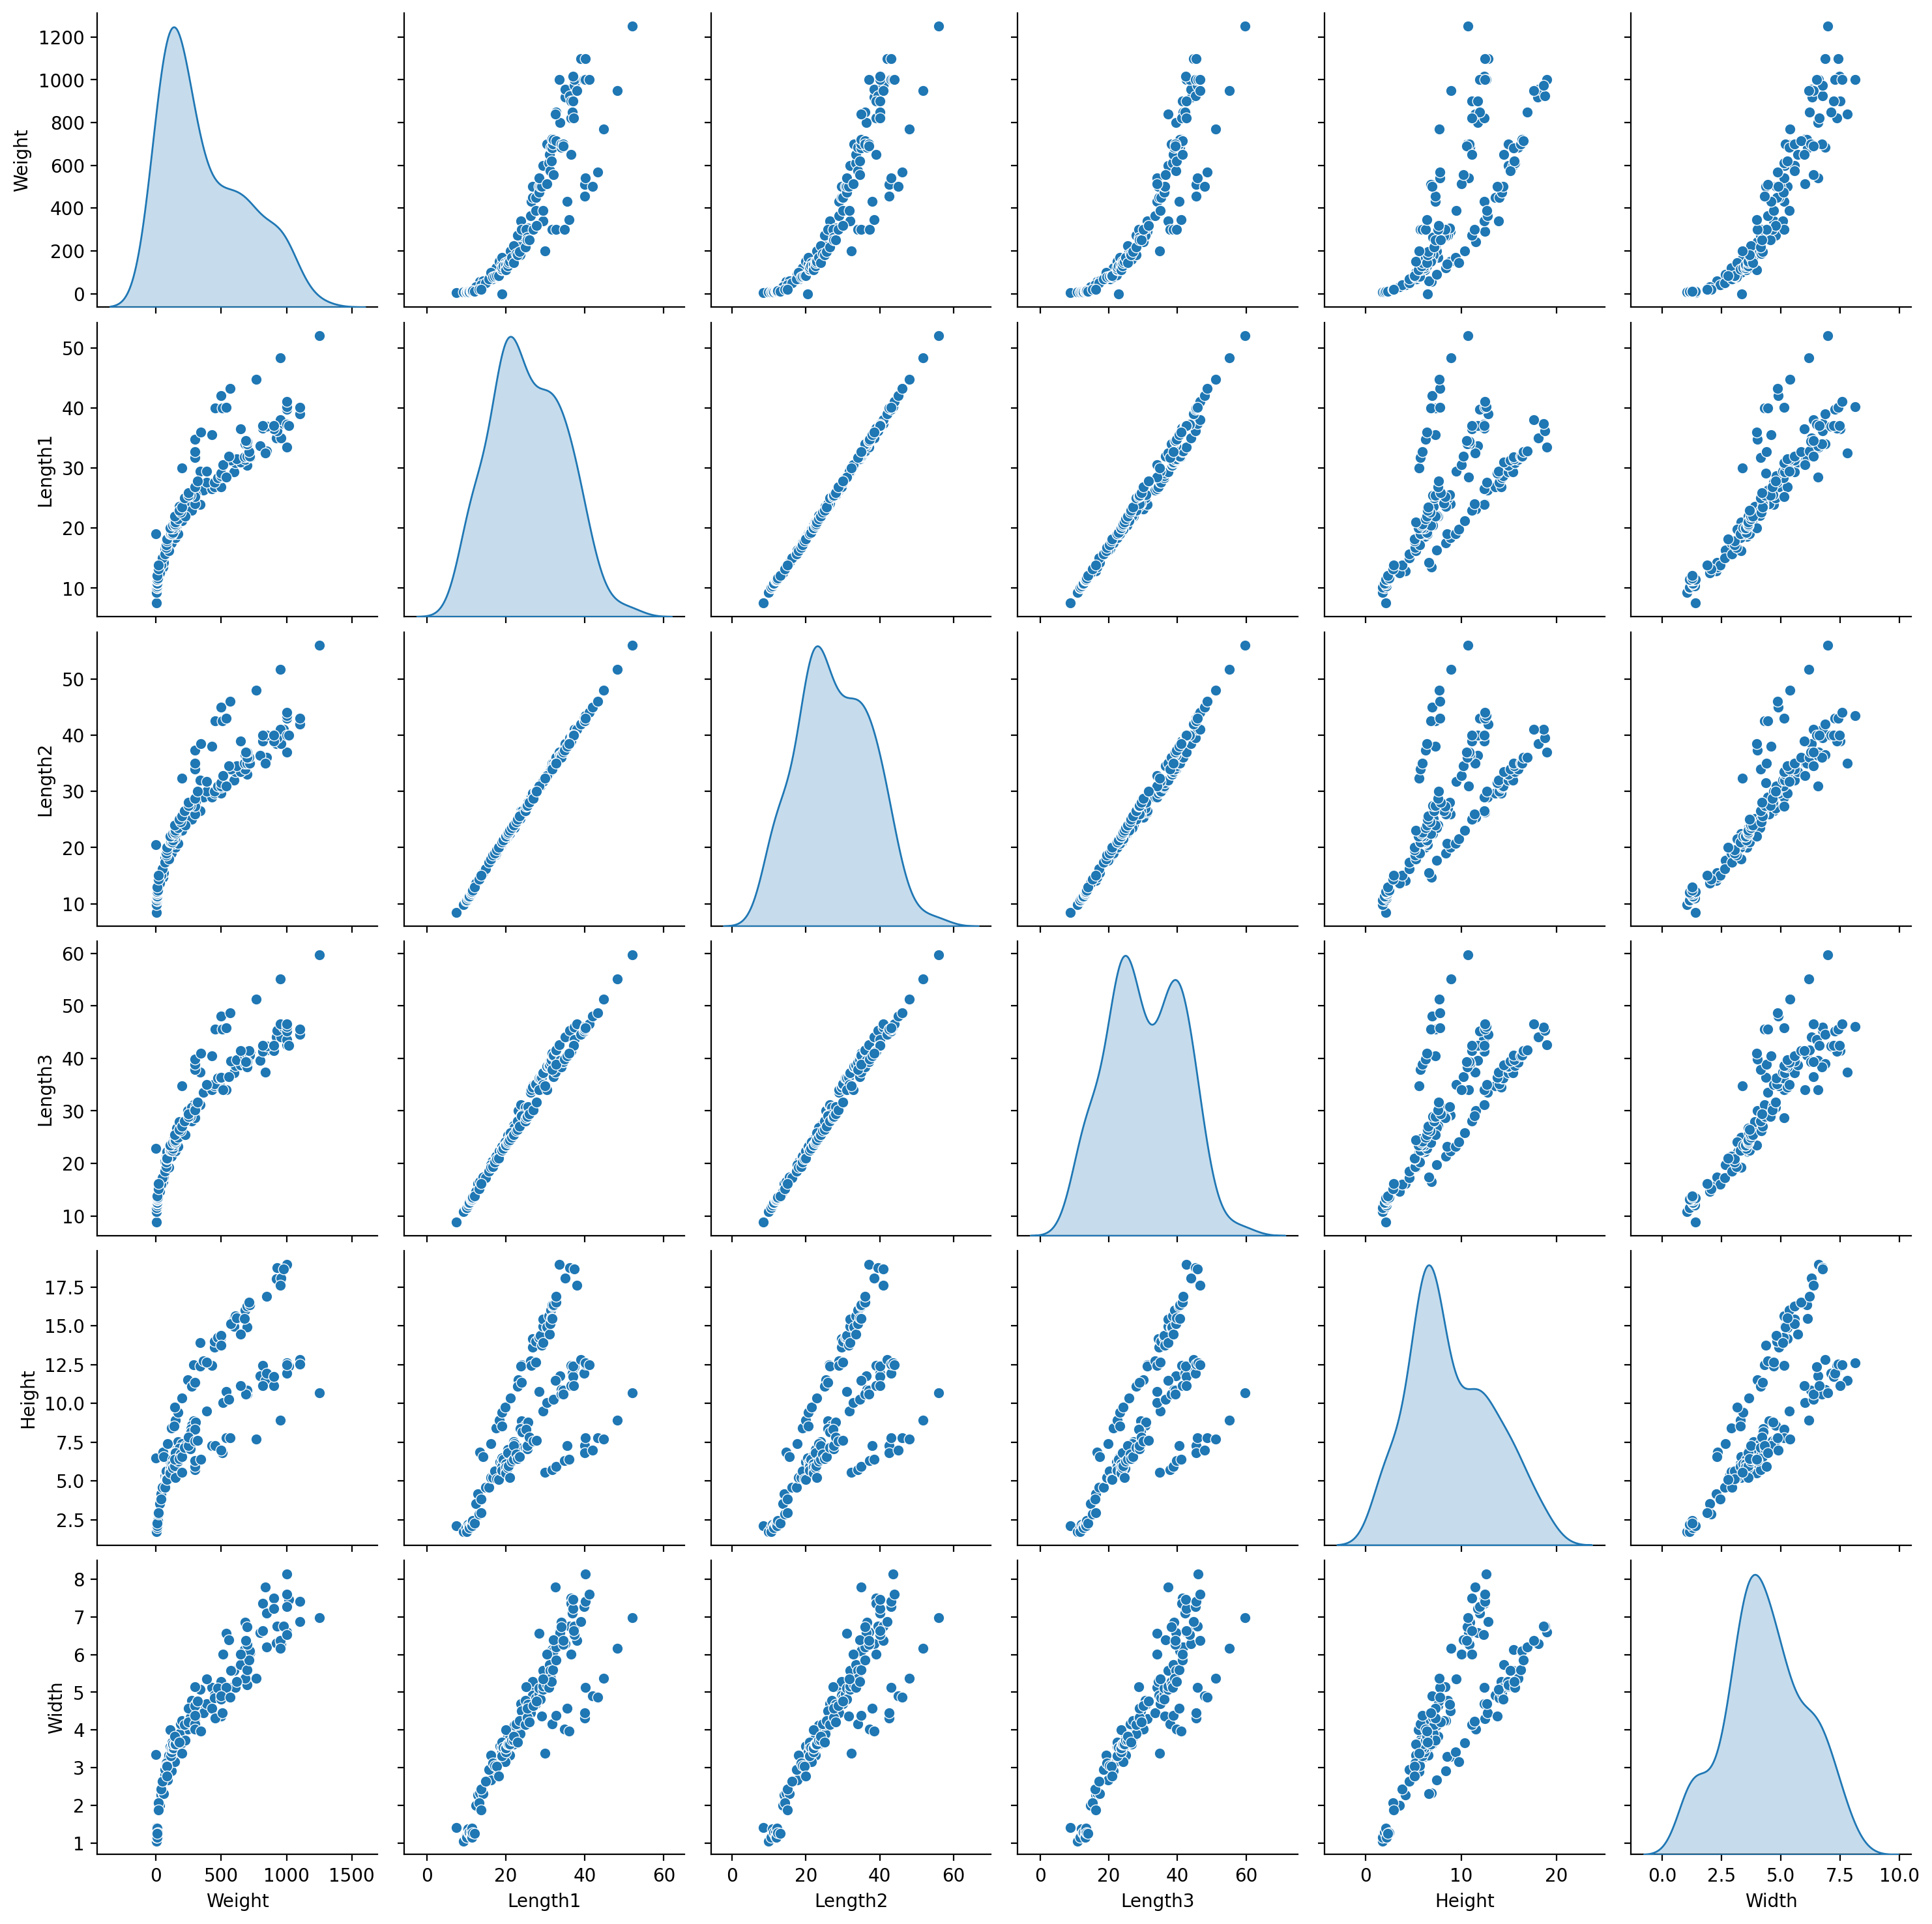

In [198]:
sns.pairplot(fish, diag_kind='kde')

Text(0.5, 1.0, 'Hubungan antara data dengan variabel target prediksi')

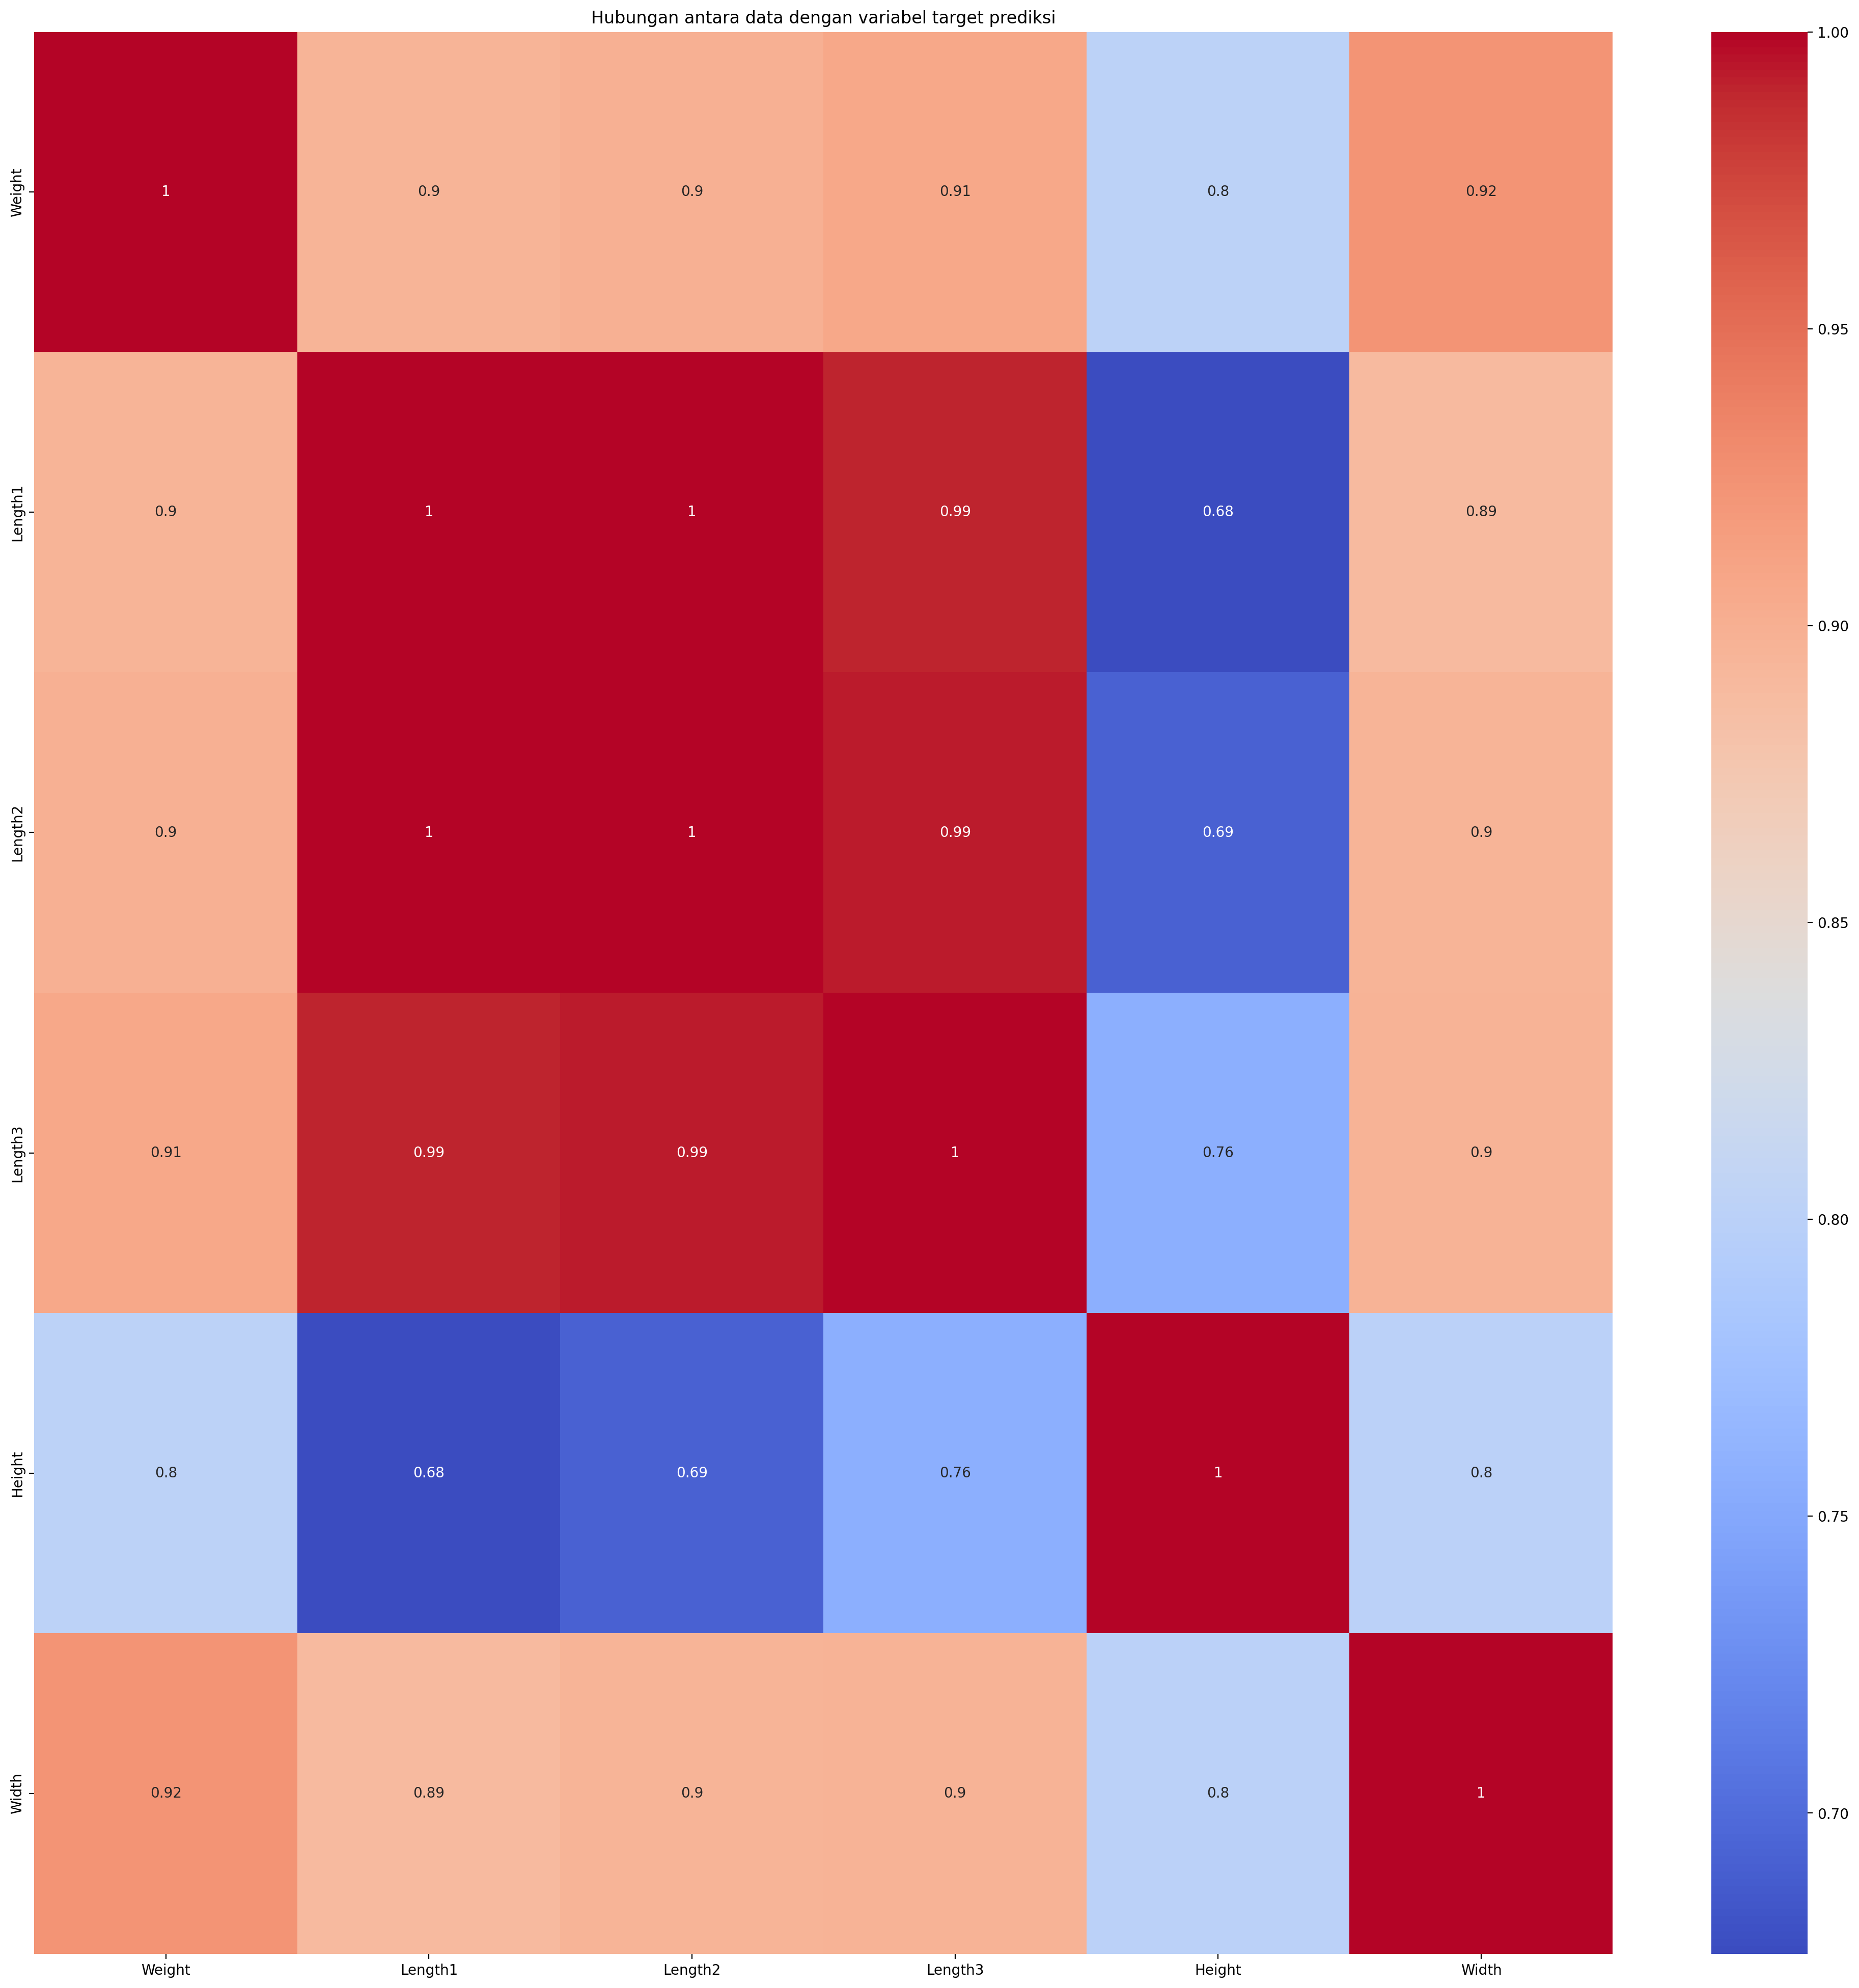

In [199]:
plt.figure(figsize=(25, 25))
sns.heatmap(data=fish.corr(), annot=True, cmap='coolwarm')
plt.title('Hubungan antara data dengan variabel target prediksi')

In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_column:
  fish[col] = le.fit_transform(fish[col])
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [201]:
X = fish.drop(['Species'], axis=1)
y = fish['Species']

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

In [203]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
feature = numerical_feature
X_train[feature] = sc.fit_transform(X_train[feature])
X_test[feature] = sc.fit_transform(X_test[feature])

In [204]:
X_train.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,-1.490871e-16,2.442491e-16,2.157005e-16,-7.993606e-16,-1.934960e-16,-1.268826e-17
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-1.128145e+00,-1.928986e+00,-1.919398e+00,-1.974119e+00,-1.646630e+00,-1.971450e+00
25%,-7.515843e-01,-6.749814e-01,-6.692265e-01,-6.970141e-01,-6.703556e-01,-5.826455e-01
50%,-3.195300e-01,-1.352144e-01,-1.305347e-01,-1.097325e-01,-3.140391e-01,-7.316176e-02
75%,6.761770e-01,7.235059e-01,7.842249e-01,8.620789e-01,7.737553e-01,6.182968e-01
max,2.835656e+00,2.923465e+00,2.918664e+00,2.770744e+00,2.441090e+00,2.033954e+00


In [205]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'DeepLearning'])

In [206]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [207]:
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=24, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)    

In [208]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

DL = tf.keras.Sequential([
    Dense(50, input_shape=[6], activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=1e-3)

DL.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

DL.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

models.loc['train_mse','DeepLearning'] = mean_squared_error(y_pred=DL.predict(X_train), y_true=y_train)  

Epoch 1/100
5/5 [==============================] - 1s 39ms/step - loss: 6.9835 - mae: 2.1538 - val_loss: 7.2178 - val_mae: 2.0377
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 4.8622 - mae: 1.7805 - val_loss: 5.3441 - val_mae: 1.7399
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 3.5153 - mae: 1.5049 - val_loss: 4.1843 - val_mae: 1.4729
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 2.7110 - mae: 1.3021 - val_loss: 3.5360 - val_mae: 1.3546
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2.1908 - mae: 1.1225 - val_loss: 3.2600 - val_mae: 1.2467
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 2.0532 - mae: 1.0465 - val_loss: 3.1010 - val_mae: 1.1354
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 1.9345 - mae: 0.9920 - val_loss: 2.8102 - val_mae: 1.0223
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 1.7333 - mae: 0.8915 - va

In [209]:
X_test.loc[:, feature] = sc.transform(X_test[feature])

In [210]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','DL'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'DL': DL}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000889,0.010565
RF,0.000169,0.007625
DL,0.000341,0.003644


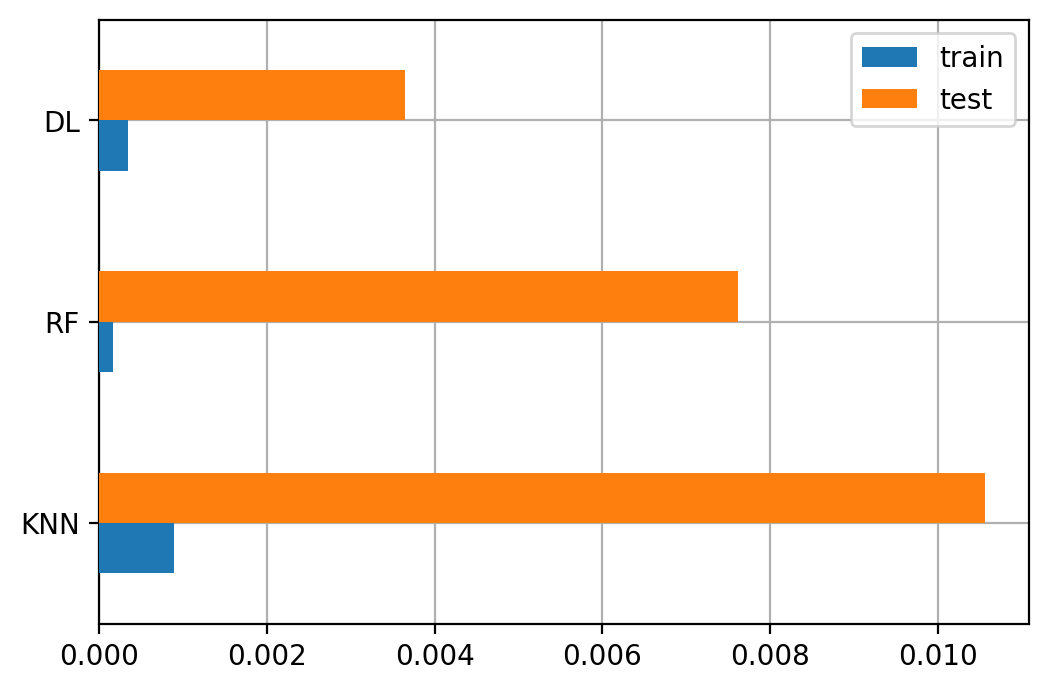

In [211]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [212]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)[0].round(0).astype(int)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_DL
48,4,5,4,4
